In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [340]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [341]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [343]:
data = data.drop(['customerID'], axis = 1)

In [344]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [345]:
data.drop(labels=data[data['TotalCharges'].isna()].index, inplace=True, axis=0) #drop NaN TotalCharges (11)

In [346]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Visualization


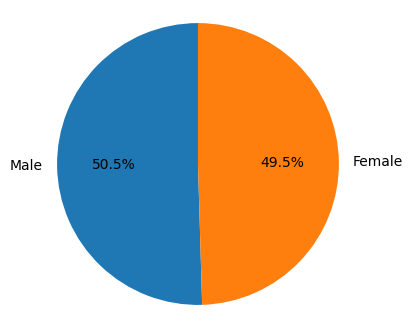

In [347]:
gender_counts = data['gender'].value_counts()

plt.figure(figsize=(4, 4))


plt.pie(gender_counts.values,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=90,
)

plt.axis('equal')
plt.show()

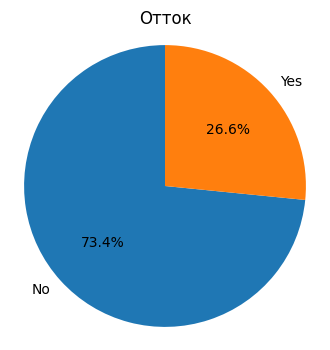

In [348]:
churn_counts = data['Churn'].value_counts()
plt.figure(figsize=(4, 4))


plt.pie(churn_counts.values,
        labels=churn_counts.index,
        autopct='%1.1f%%',
        startangle=90,
)
plt.title('Отток')
plt.axis('equal')
plt.show()

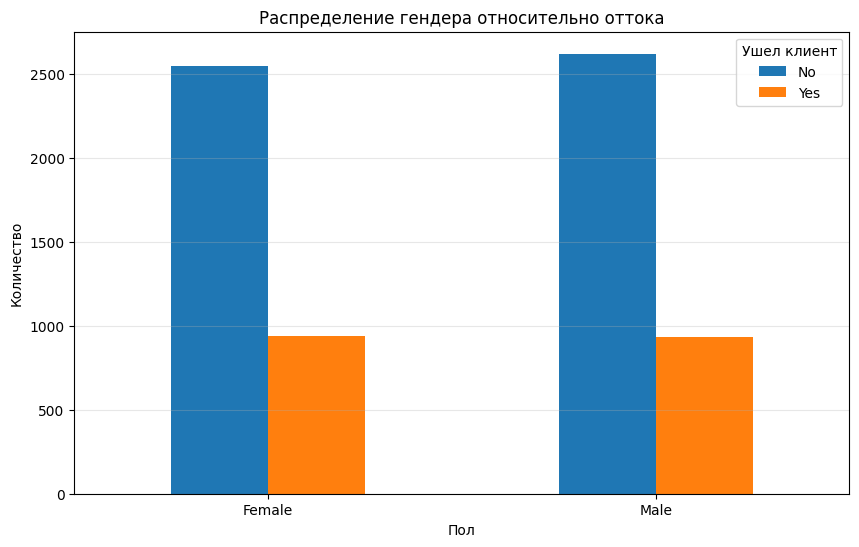

In [349]:
cross_tab_gen = pd.crosstab(data['gender'], data['Churn'])

cross_tab_gen.plot(kind='bar', figsize=(10, 6))
plt.title('Распределение гендера относительно оттока')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.legend(title='Ушел клиент')
plt.grid(axis='y', alpha=0.3)
plt.show()

Пол не влияет на отток


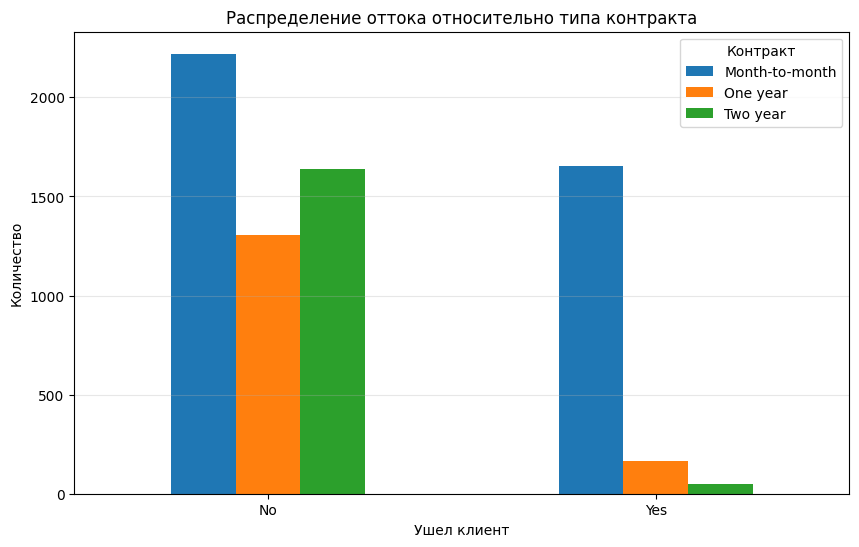

In [350]:
cross_tab_chrn = pd.crosstab(data['Churn'], data['Contract'])

cross_tab_chrn.plot(kind='bar',figsize=(10,6))
plt.title('Распределение оттока относительно типа контракта')
plt.xlabel('Ушел клиент')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.legend(title='Контракт')
plt.grid(axis='y', alpha=0.3)
plt.show()


Около 75% клиентов с помесячным контрактом решили отказаться от услуг по сравнению с 13% клиентов с годовым контрактом и 3% с двухлетним контрактом.

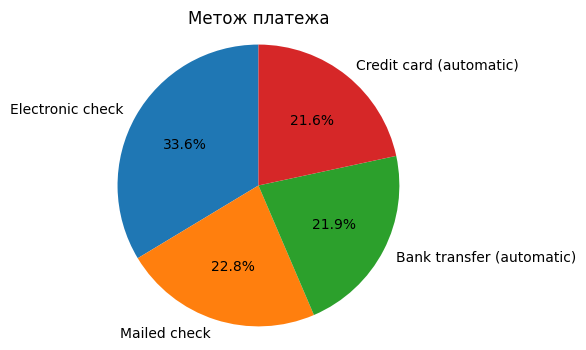

In [351]:
payment_count = data['PaymentMethod'].value_counts()
plt.figure(figsize=(4, 4))


plt.pie(payment_count.values,
        labels=payment_count.index,
        autopct='%1.1f%%',
        startangle=90,
)
plt.title('Метож платежа')
plt.axis('equal')
plt.show()

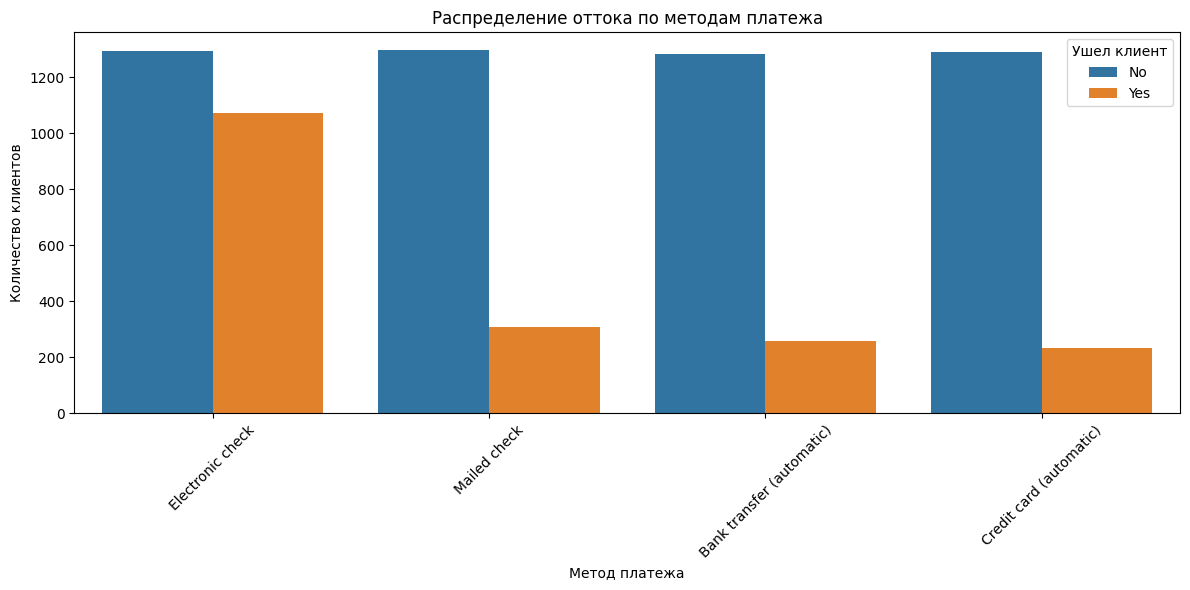

In [352]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='PaymentMethod', hue='Churn')
plt.title('Распределение оттока по методам платежа')
plt.xlabel('Метод платежа')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.legend(title='Ушел клиент')
plt.tight_layout()
plt.show()


Большинство клиентов, съехавших из квартиры, использовали электронные чеки в качестве способа оплаты.
Клиенты, выбравшие автоматический перевод на кредитную карту или автоматический банковский перевод и отправку чека по почте, реже съезжали.

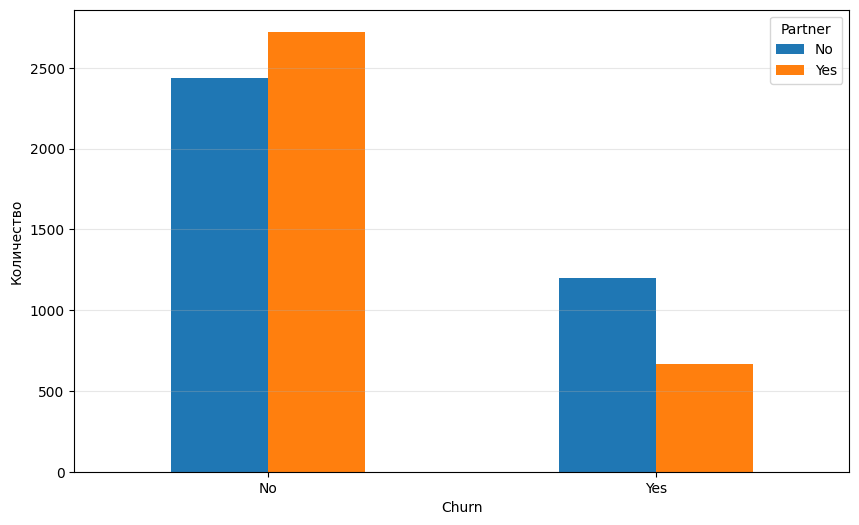

In [353]:
cross_tab_partners = pd.crosstab(data['Churn'], data['Partner'] )

cross_tab_partners.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

Клиенты без партнера чаще уходят


<Axes: xlabel='Churn', ylabel='count'>

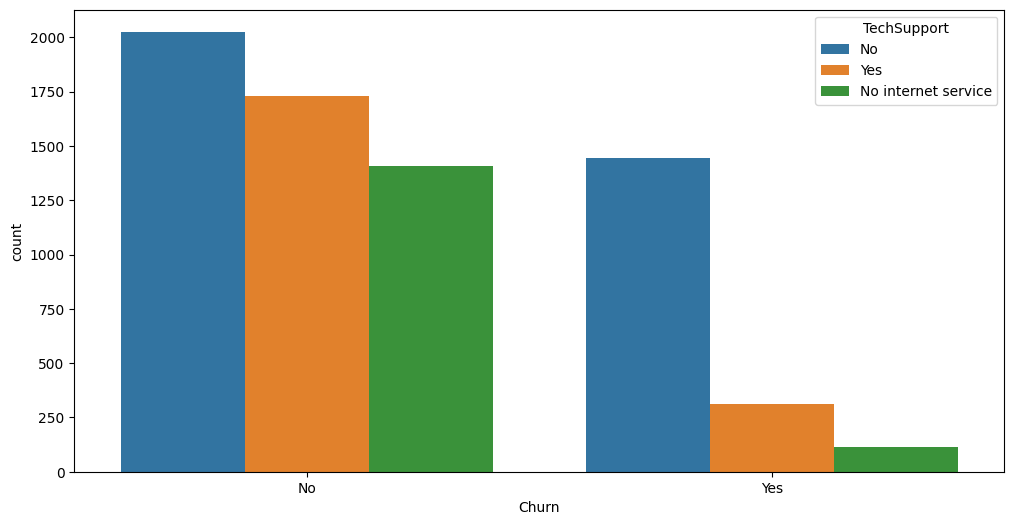

In [354]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Churn', hue='TechSupport')

Клиенты, у которых нет технической поддержки, скорее всего, перейдут к другому поставщику услуг.


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

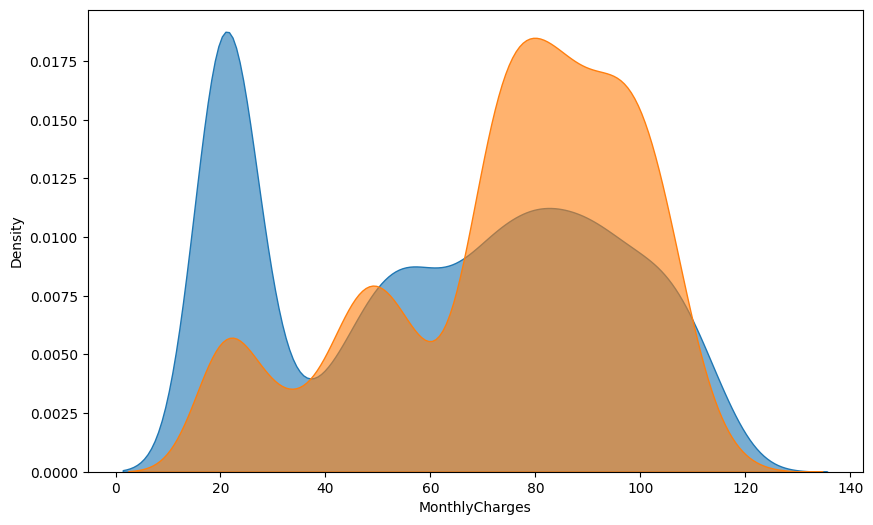

In [355]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['Churn'] == 'No'],
            x='MonthlyCharges',
            label='No Churn',
            fill=True,
            alpha=0.6,
            common_norm=False)

sns.kdeplot(data=data[data['Churn'] == 'Yes'],
            x='MonthlyCharges',
            label='Churn',
            fill=True,
            alpha=0.6,
            common_norm=False)

Клиенты с более высокими ежемесячными платежами также более склонны к оттоку.

<Axes: >

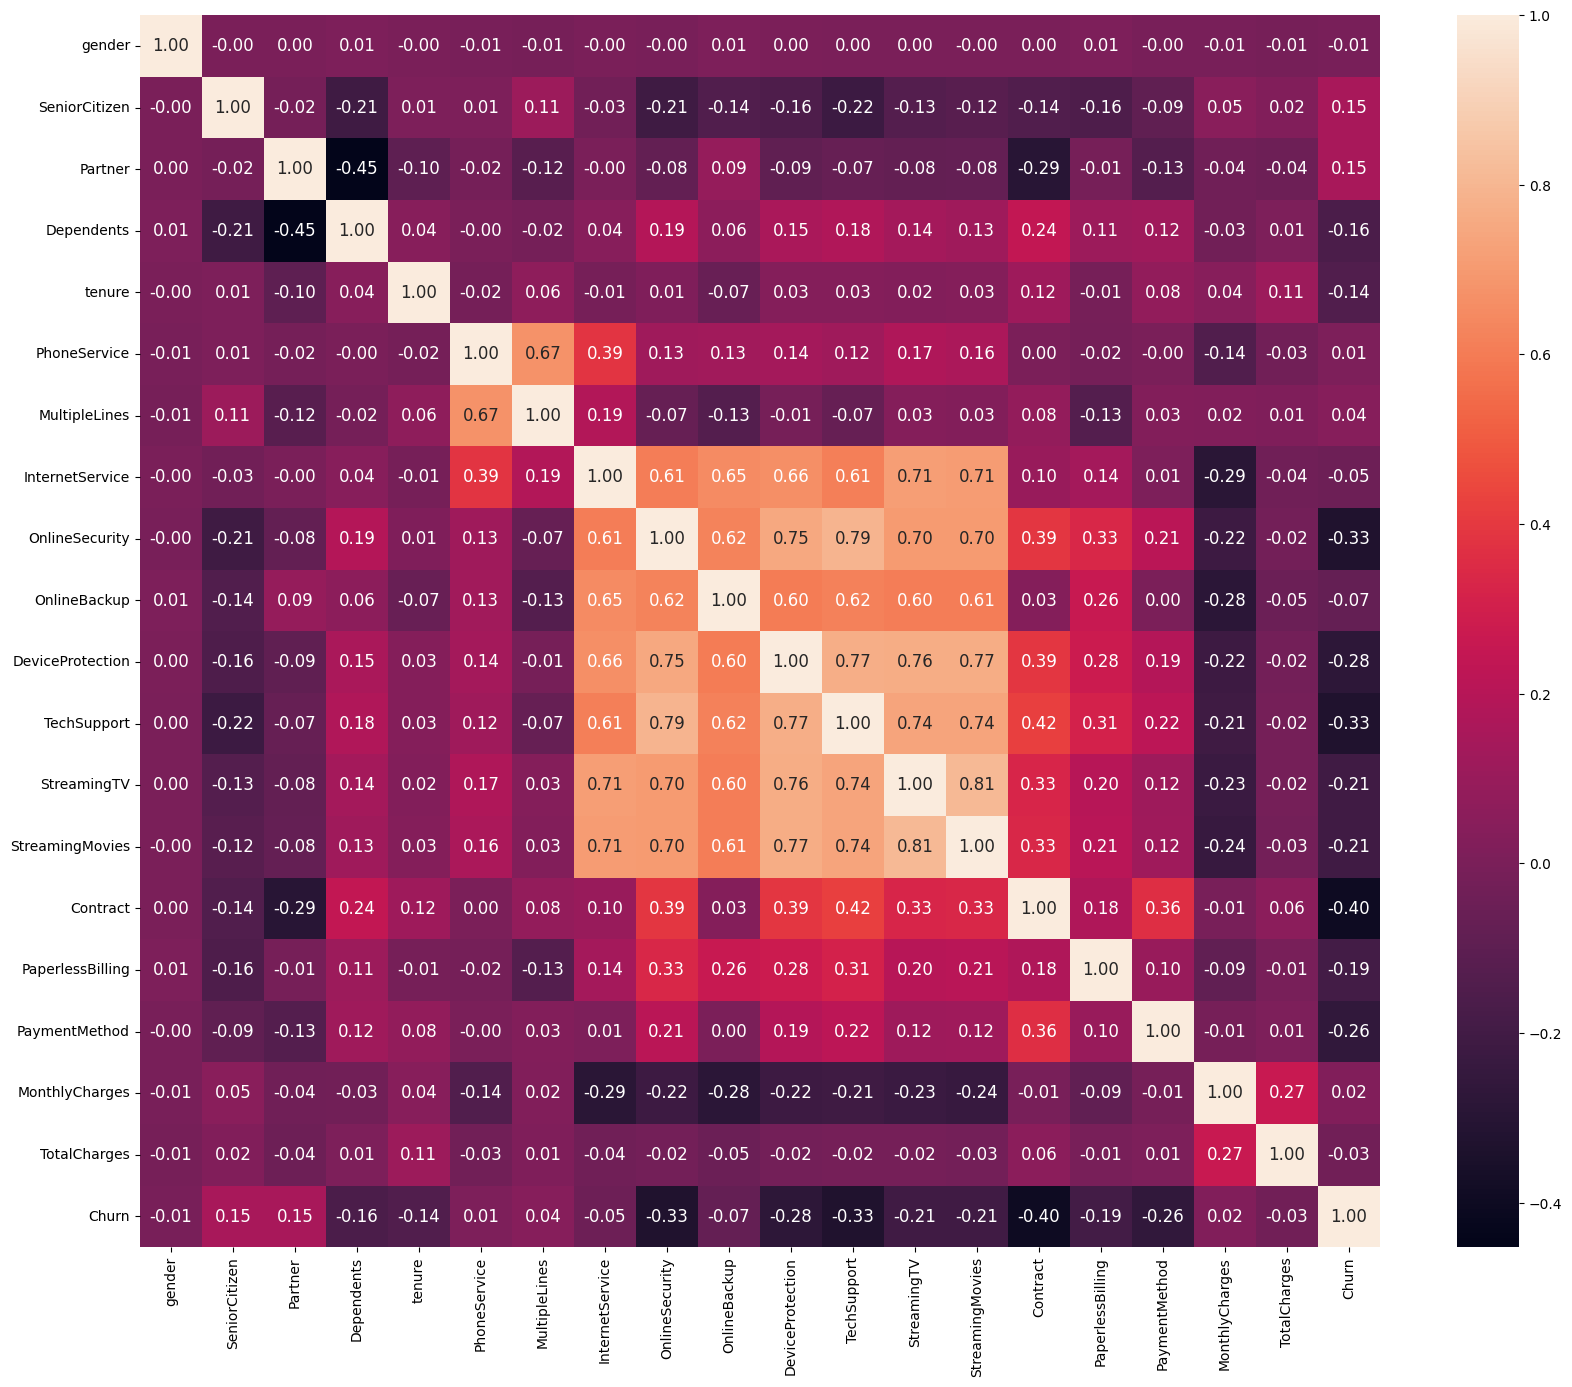

In [356]:
plt.figure(figsize=(20, 16))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr,
            fmt='.2f',
            annot=True,
            annot_kws={'size': 12})

Preprocessing


In [357]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataSeries):
  if dataSeries.dtype =='object':
    dataSeries = LabelEncoder().fit_transform(dataSeries)
  return dataSeries

In [358]:

data_orig = data
data = data.apply(lambda x: object_to_int(x))
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [359]:
plt.figure(figsize=(14,7))
data.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
PaymentMethod,0.107852
MultipleLines,0.038043
PhoneService,0.011691
gender,-0.008545
StreamingTV,-0.036303
StreamingMovies,-0.038802


<Figure size 1400x700 with 0 Axes>

In [360]:
X = data.drop(columns=['Churn'])
y = data['Churn'].values

In [361]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

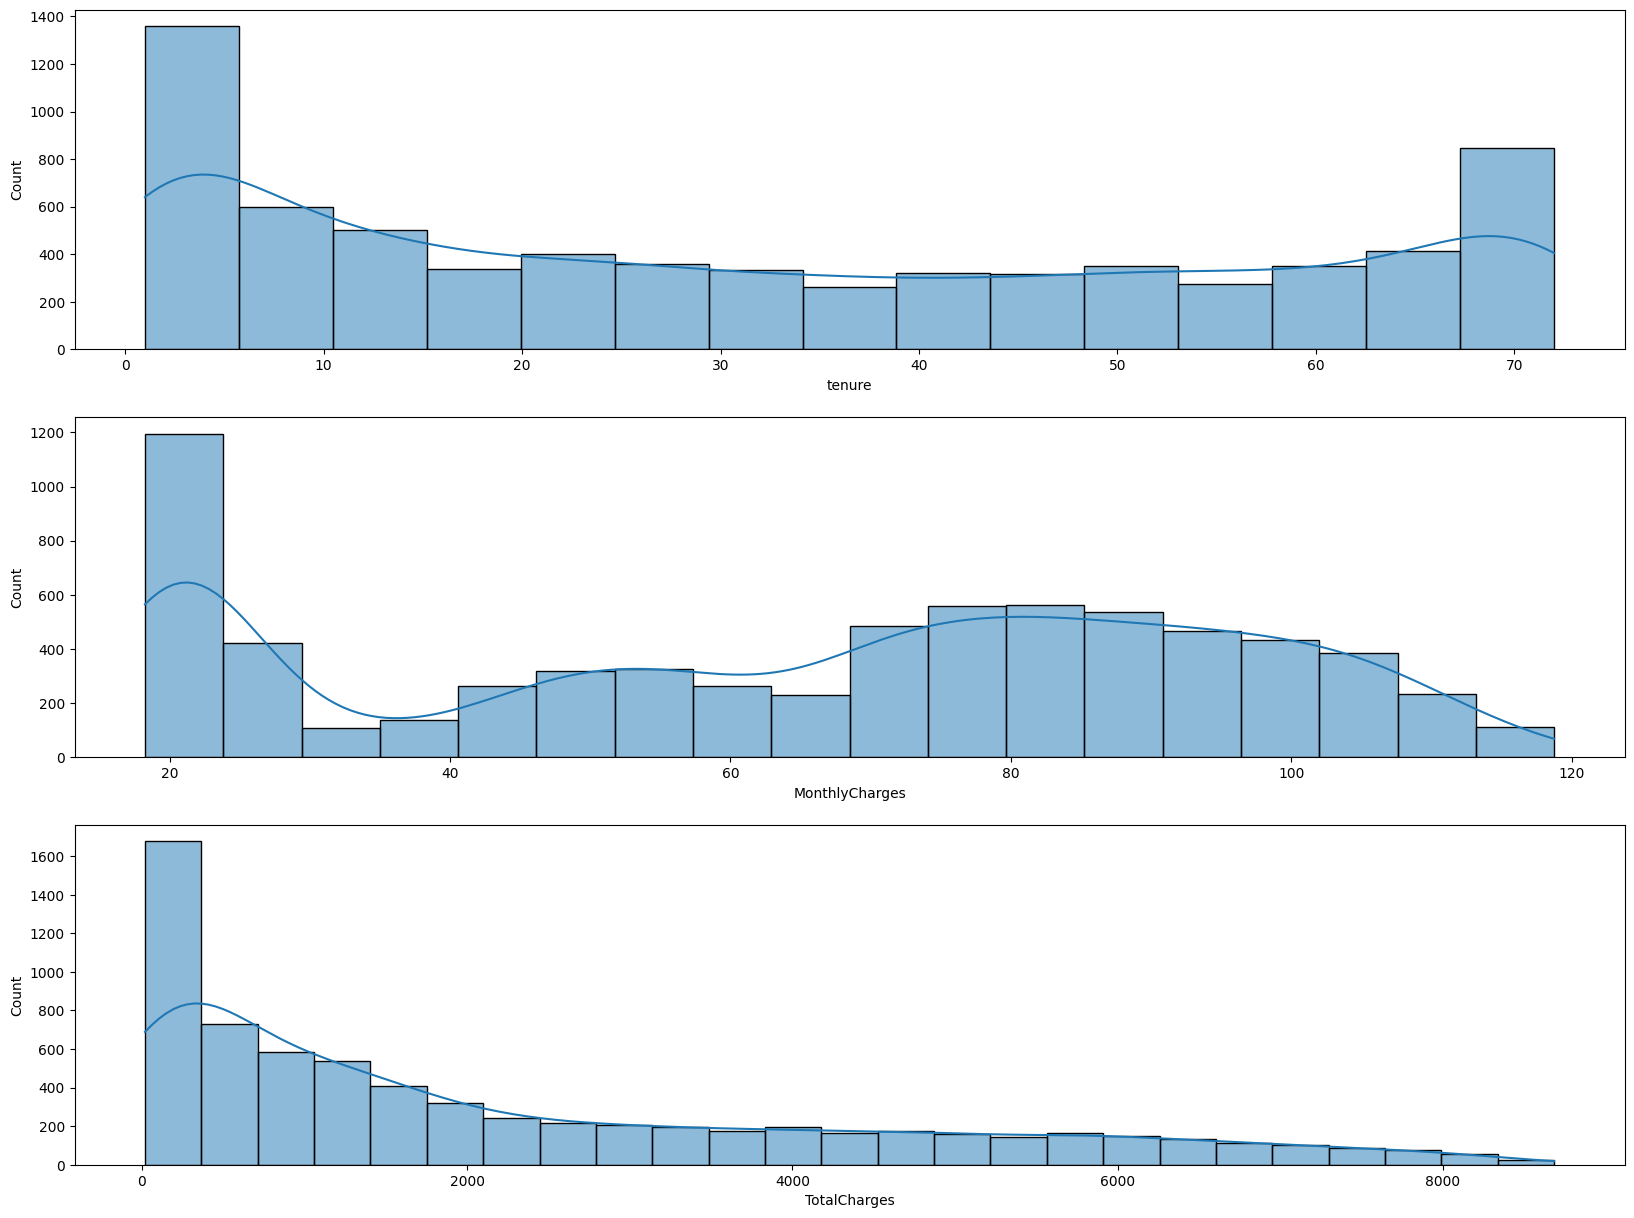

In [362]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(len(num_cols), 1, figsize=(20,5*len(num_cols)))

for i, col in enumerate(num_cols):
  sns.histplot(data=data, x=col, kde=True, ax=axes[i])

In [363]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

from sklearn.metrics import classification_report

In [364]:
from sklearn.neighbors import KNeighborsClassifier


param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=stratified_cv,
    scoring='roc_auc_ovr_weighted',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc_ovr_weighted')

In [365]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}


In [366]:
grid_search.best_score_

np.float64(0.8200915750522808)

In [367]:
knn_model = grid_search.best_estimator_

In [368]:
y_proba = knn_model.predict_proba(X_test)[:, 1]

In [369]:
y_pred_high_threshold = (y_proba > 0.35).astype(int)

In [370]:
print(classification_report(y_test,y_pred_high_threshold))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1549
           1       0.53      0.74      0.62       561

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.76      0.77      2110



In [371]:
from sklearn.ensemble import RandomForestClassifier

In [372]:
param_grid = {
    'n_estimators': [100,200,500],
    'max_depth': [5,7,10,15]
}

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV(
    RandomForestClassifier(random_state=14,class_weight = 'balanced'),
    param_grid,
    cv=stratified_cv,
    scoring='roc_auc_ovr_weighted',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=14),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 15],
                         'n_estimators': [100, 200, 500]},
             scoring='roc_auc_ovr_weighted')

In [373]:
grid_search.best_params_

{'max_depth': 7, 'n_estimators': 500}

{'max_depth': 7, 'n_estimators': 500}

In [374]:
grid_search.best_score_

np.float64(0.8421676718868785)

In [375]:
rf_model = grid_search.best_estimator_

In [390]:
y_proba = rf_model.predict_proba(X_test)[:, 1]
y_pred_high_threshold = (y_proba > 0.35).astype(int)

In [391]:
print(classification_report(y_test,y_pred_high_threshold))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1033
           1       0.47      0.75      0.58       374

    accuracy                           0.71      1407
   macro avg       0.68      0.72      0.68      1407
weighted avg       0.78      0.71      0.73      1407



In [378]:

feature_importances = rf_model.feature_importances_


importance_data_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

print(importance_data_rf)

             feature  importance
14          Contract    0.225873
4             tenure    0.148450
18      TotalCharges    0.114013
17    MonthlyCharges    0.098371
8     OnlineSecurity    0.089830
11       TechSupport    0.087928
7    InternetService    0.059807
16     PaymentMethod    0.040440
9       OnlineBackup    0.025713
10  DeviceProtection    0.025210
15  PaperlessBilling    0.016372
13   StreamingMovies    0.011305
12       StreamingTV    0.011051
6      MultipleLines    0.009485
3         Dependents    0.009187
1      SeniorCitizen    0.008267
2            Partner    0.007269
0             gender    0.006639
5       PhoneService    0.004790


In [379]:
from catboost import CatBoostClassifier
from catboost import Pool, cv

In [380]:
data_orig

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [381]:
X_cat = data_orig.drop(columns=['Churn'])
y = data_orig['Churn'].map({'Yes':1,
                            'No':0})

cat_features = [col for col in X_cat.columns if X_cat[col].dtype == 'object']

In [382]:
cat_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [383]:
from catboost import CatBoostClassifier
from catboost import Pool, cv

In [384]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

cat_model = CatBoostClassifier(random_state=14,auto_class_weights = 'Balanced',eval_metric='F1')

cat_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50,
    verbose=100,

)

Learning rate set to 0.04855
0:	learn: 0.7667785	test: 0.7329425	best: 0.7329425 (0)	total: 20.5ms	remaining: 20.5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7632831492
bestIteration = 9

Shrink model to first 10 iterations.


In [385]:
y_pred_proba = cat_model.predict_proba(X_test)


y_pred = cat_model.predict(X_test)


feature_importances = cat_model.get_feature_importance()
feature_names = X_train.columns


importance_data_cat = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

In [386]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1033
           1       0.48      0.82      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.75      0.69      1407
weighted avg       0.80      0.71      0.73      1407



In [387]:
importance_data_cat

,feature,importance
14,Contract,45.348963
17,MonthlyCharges,18.816979
8,OnlineSecurity,18.030038
4,tenure,12.380792
18,TotalCharges,2.548252
15,PaperlessBilling,0.919330
1,SeniorCitizen,0.831528
5,PhoneService,0.645079
3,Dependents,0.479038
2,Partner,0.000000


In [392]:
cat_model.save_model('catboost_model.cbm')

Из трех моделей (KNN, Random Forest, CatBoost) наилучший результат показал CatBoost с recall 82% для первого класса(клиент ушел).Так же наиболее влияющие параметры на целевой класс: Тип контракта, Стоимость услуги и срок сотрудничества.

